<a href="https://colab.research.google.com/github/nachi-hebbar/ARIMA-Temperature_Forecasting/blob/master/Temperature_Forecast_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
# !pip -m install patsy
from statsmodels.tsa.stattools import adfuller



#Read Data

In [3]:


# Step 2: Load the CSV data
df = pd.read_csv('Earthquakes_v2.csv', index_col= 'DATETIME')
df
col = col = ["LAT", "LONG", "DEPTH"]
df.drop(col, axis=1, inplace=True)
# df=df['Mag'].dropna()
# df.dropna(how='all', inplace = True)
# df['Average Magnitude'].fillna(4, inplace= True)
df = df.dropna()
df = df[0:1000]
df.head()


,MAGNITUDE
DATETIME,
1/7/1965 10:22,5.3
1/10/1965 8:02,4.9
1/12/1965 17:26,4.0
1/15/1965 14:56,4.5
3/9/1965 19:16,4.2


In [4]:
# !pip3 install --upgrade --no-deps statsmodels
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

#Plot Your Data

<AxesSubplot:xlabel='DATETIME'>

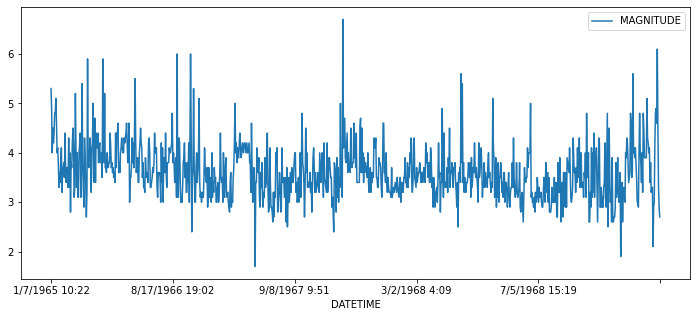

In [5]:
df.plot(figsize=(12,5))

#Check For Stationarity

In [6]:
ad_test(df)

1. ADF :  -5.0519789675425955
2. P-Value :  1.749505460390554e-05
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression: 986
5. Critical Values :
	 1% :  -3.4369994990319355
	 5% :  -2.8644757356011743
	 10% :  -2.5683331327427803


#Figure Out Order for ARIMA Model

In [7]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [19]:
stepwise_fit = auto_arima(df,  stepwise =False, Seasonal = False,
                          
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(4, 1, 1)   Log Likelihood                -740.647
Date:                Sun, 23 Apr 2023   AIC                           1495.293
Time:                        12:38:07   BIC                           1529.641
Sample:                             0   HQIC                          1508.348
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.000     -0.467      0.640      -0.001       0.001
ar.L1          0.2153      0.033      6.532      0.000       0.151       0.280
ar.L2          0.0652      0.028      2.307      0.021       0.010       0.121
ar.L3          0.0219      0.029      0.764      0.445      -0.034       0.078
ar.L4          0.0929      0.029      3.215      0.001       0.036       0.150
ma.L1         -0.9754      0.009   -108.542      0.000      -0.993      -0.958
sigma2         0.2573      0.008     31.944      0.000       0.242       0.273
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               781.48
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             1.05
Prob(H) (two-sided):                  0.58   Kurtosis:                         6.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
from statsmodels.tsa.arima_model import ARIMA

#Split Data into Training and Testing

In [10]:
print(df.shape)
train=df.iloc[:-200]
test=df.iloc[-200:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1000, 1)
(800, 1) (200, 1)
MAGNITUDE    3.0
Name: 7/5/1968 15:19, dtype: float64 MAGNITUDE    2.7
Name: 12/17/1968 3:38, dtype: float64


## Train the Model

In [20]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train,order=(4,1,1))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              MAGNITUDE   No. Observations:                  800
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -565.005
Date:                Sun, 23 Apr 2023   AIC                           1142.010
Time:                        12:39:17   BIC                           1170.111
Sample:                             0   HQIC                          1152.806
                                - 800                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1887      0.037      5.129      0.000       0.117       0.261
ar.L2          0.0614      0.030      2.043      0.041       0.002       0.120
ar.L3          0.0002      0.032      0.007      0.994      -0.063       0.063
ar.L4          0.1269      0.033      3.851      0.000       0.062       0.191
ma.L1         -0.9752      0.011    -88.176      0.000      -0.997      -0.953
sigma2         0.2402      0.008     31.336      0.000       0.225       0.255
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               970.34
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             1.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Make Predictions on Test Set

In [21]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')

pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.index= df.index[start:end+1]
#test['Prediction'] = pred
test.head()

#print(pred)

,MAGNITUDE
DATETIME,
7/5/1968 15:19,3.0
7/5/1968 17:49,3.3
7/5/1968 20:12,3.1
7/5/1968 21:05,3.1
7/5/1968 22:25,3.2


<AxesSubplot:xlabel='DATETIME'>

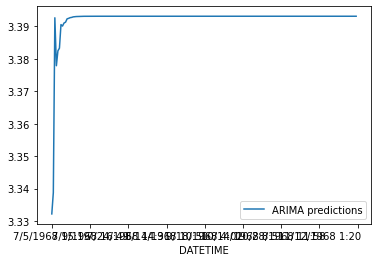

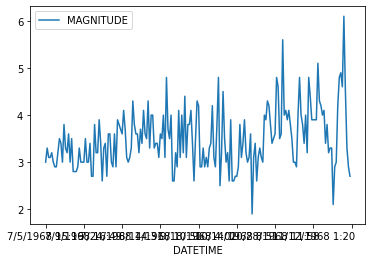

In [22]:
pred.plot(legend='ARIMA Predictions')
test.plot(legend=True)

In [14]:
test.mean()

MAGNITUDE    3.494
dtype: float64

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)


0.6143386280490954


In [16]:
model2=ARIMA(df,order=(1,0,5))
model2=model2.fit()
df.tail()

,MAGNITUDE
DATETIME,
12/5/1968 7:52,6.1
12/10/1968 11:28,4.5
12/10/1968 20:13,3.3
12/16/1968 15:34,2.9
12/17/1968 3:38,2.7


#For Future Dates

In [17]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
#pred.index=index_future_dates
print(pred)

1000    3.472164
1001    3.554521
1002    3.620576
1003    3.643910
1004    3.734884
1005    3.733235
1006    3.731617
1007    3.730026
1008    3.728464
1009    3.726930
1010    3.725422
1011    3.723942
1012    3.722487
1013    3.721059
1014    3.719655
1015    3.718277
1016    3.716922
1017    3.715592
1018    3.714285
1019    3.713002
1020    3.711741
1021    3.710503
1022    3.709286
1023    3.708091
1024    3.706917
1025    3.705764
1026    3.704631
1027    3.703519
1028    3.702426
1029    3.701352
1030    3.700297
Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

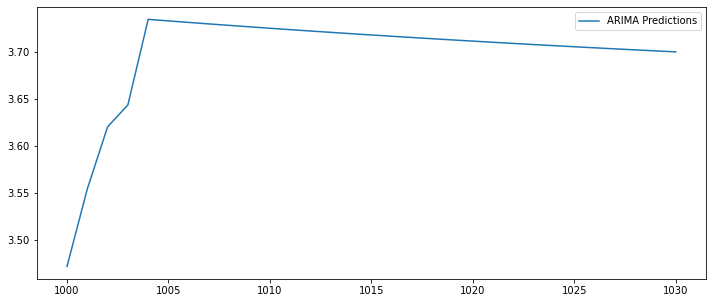

In [18]:
pred.plot(figsize=(12,5),legend=True)
